<a href="https://colab.research.google.com/github/Betsy15/Numberplate-detection/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
!pip install easyocr
!pip install xlsxwriter

In [66]:
import os
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import easyocr


In [67]:
1167108
411620

411620

In [68]:
# x0 = 1050
# x1 = 1350
# y0 = 270
# y1 = 450
# fgbg = cv2.createBackgroundSubtractorMOG2()
# cap = cv2.VideoCapture(r"F:/work/weldrod/New folder/New folder/411620.mp4")

In [69]:
# x0 = 1350
# x1 = 1600
# y0 = 250
# y1 = 750
# fgbg = cv2.createBackgroundSubtractorMOG2()
# cap = cv2.VideoCapture(r"F:/work/weldrod/New folder/New folder/1167108.mp4")

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
import os
data= os.listdir('/content/drive/MyDrive/Colab Notebooks/PK steel/PK videos')
data

['1167108.mp4', '814808.mp4', '411620.mp4', '793262.mp4']

In [72]:
x0 = 500
x1 = 850
y0 = 450
y1 = 700
fgbg = cv2.createBackgroundSubtractorMOG2()
cap = cv2.VideoCapture(r"/content/drive/MyDrive/Colab Notebooks/PK steel/PK videos/411620.mp4")

In [73]:
x0 = 500
x1 = 850
y0 = 350
y1 = 700
fgbg = cv2.createBackgroundSubtractorMOG2()
cap = cv2.VideoCapture(r"/content/drive/MyDrive/Colab Notebooks/PK steel/PK videos/411620.mp4")
i=0



# Assigning our static_back to None
static_back = None

# List when any moving object appear
motion_list = [ None, None ]

# Time of movement
time = []

j=0

while(cap.isOpened()):
    ret, frame = cap.read()

    if ret == True:
#         cv2.imshow("crop", frame)
#         frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        fgmask = fgbg.apply(frame)
        fgmask_crop= fgmask[y0:y1, x0:x1]
        frame_crop = frame[y0:y1, x0:x1]
        
        fg = cv2.copyTo(frame,fgmask)
        bg=cv2.copyTo(frame,cv2.bitwise_not(fgmask))
        pixels = cv2.countNonZero(fgmask_crop)
        image_area = frame_crop.shape[0] * frame_crop.shape[1]
        area_ratio = (pixels / image_area) * 100
        if area_ratio>10:
# #             edges=cv2.Canny(frame_crop,30,200)
#             cnts,new=cv2.findContours(frame_crop.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
#             _=cv2.drawContours(frame_crop,cnts,-1,(255,0,255),2)
#             i=i+1
#             print(i)
# #             target= 'F:/work/weldrod/New folder/New folder/op'
# #             fileName = ("res%d.png" % (i))
# #             path_nm = os.path.join(target, fileName)
# #             cv2.imwrite(path_nm,frame_crop)
#             cv2.line(frame_crop,(100,200),(100,290),(0,0,0),2)
#             cv2.imshow("crop", frame)


            motion = 0
            
            # Converting color image to gray_scale image
            gray = cv2.cvtColor(frame_crop, cv2.COLOR_BGR2GRAY)

            # Converting gray scale image to GaussianBlur
            # so that change can be find easily
            gray = cv2.GaussianBlur(gray, (21, 21), 0)

            # In first iteration we assign the value
            # of static_back to our first frame
            if static_back is None:
                static_back = gray
                continue

            # Difference between static background
            # and current frame(which is GaussianBlur)
            diff_frame = cv2.absdiff(static_back, gray)

            # If change in between static background and
            # current frame is greater than 30 it will show white color(255)
            thresh_frame = cv2.threshold(diff_frame, 30, 255, cv2.THRESH_BINARY)[1]
            thresh_frame = cv2.dilate(thresh_frame, None, iterations = 2)
            i=i+1
            # Finding contour of moving object
            cnts,_ = cv2.findContours(thresh_frame.copy(),
                            cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            for contour in cnts:
                if cv2.contourArea(contour) < 10000:
                    continue
                motion = 1

                (x, y, w, h) = cv2.boundingRect(contour)
                # making green rectangle arround the moving object
                cv2.rectangle(frame_crop, (x, y), (x + w, y + h), (0, 255, 0), 3)
                
                frame_crop = frame_crop[y:y + h, x:x + w]

                if x!=0:
                    j=j+1
                    if j==13:
                        target= '/content/drive/MyDrive/videos/cropped_images'
                        fileName = ("res%d.png" % (i))
                        path_nm = os.path.join(target, fileName)
                        cv2.imwrite(path_nm,frame_crop)
                        im=frame_crop
                
            # Appending status of motion
            motion_list.append(motion)

            motion_list = motion_list[-2:]

        # 	# Appending Start time of motion
        # 	if motion_list[-1] == 1 and motion_list[-2] == 0:
        # 		time.append(datetime.now())

            # Appending End time of motion
        # 	if motion_list[-1] == 0 and motion_list[-2] == 1:
        # 		time.append(datetime.now())

            # Displaying image in gray_scale
            #plt.imshow("Gray Frame", gray)

            # Displaying the difference in currentframe to
            # the staticframe(very first_frame)
            #plt.imshow("Difference Frame", diff_frame)

            # Displaying the black and white image in which if
            # intensity difference greater than 30 it will appear white
            #plt.imshow("Threshold Frame", thresh_frame)

            # Displaying color frame with contour of motion of object
            #plt.imshow("Color Frame", frame_crop)
        key = cv2.waitKey(25)
        if key == ord('q'):
            break
    else:
        break

cv2.destroyAllWindows()
#out.release()
cap.release()

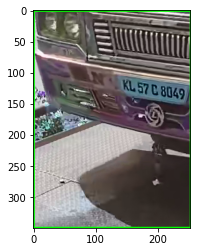

In [74]:
image_copy=im
image=im
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
blur=cv2.bilateralFilter(gray,15,55,45)
edges=cv2.Canny(blur,30,200)
cnts,new=cv2.findContours(edges.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
im_cop=image.copy()

cnts=sorted(cnts,key=cv2.contourArea,reverse=True)[:10]
im_red_cnts=image.copy()
_=cv2.drawContours(im_red_cnts,cnts,-1,(255,0,255),2)
plt.imshow(im_cop)

In [86]:
reader = easyocr.Reader(['en'])
result = reader.readtext(image_copy)

i=0;

for (bbox, text, prob) in result: 
  # unpack the bounding box
  (tl, tr, br, bl) = bbox
  tl = (int(tl[0]), int(tl[1]))
  tr = (int(tr[0]), int(tr[1]))
  br = (int(br[0]), int(br[1]))
  bl = (int(bl[0]), int(bl[1]))
  
  cropped_image = image[tr[1]-10:br[1], tl[0]:br[0]]
  cv2.imwrite(('test'+str(i)+'.png'),cropped_image)
  con=cv2.rectangle(image, tl, br, (0, 255, 0), 1)
  i=i+1
  #te=ocr(cropped_image)
  #print(te)
  
  #cv2.putText(image, text, (tl[0], tl[1] - 10),
    #cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

#plt.rcParams['figure.figsize'] = (15,15)
#plt.imshow(con)


C8049


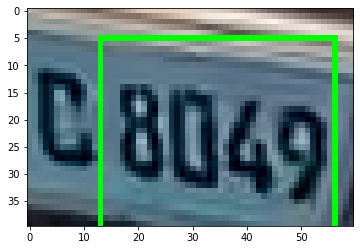

In [99]:
im0=cv2.imread("/content/test0.png")
plt.imshow(im0)
reader = easyocr.Reader(['en'])
result0 = reader.readtext(im0,detail=0)
string1=" "
C1=string1.join(result0)
print(string1.join(result0))

KL57


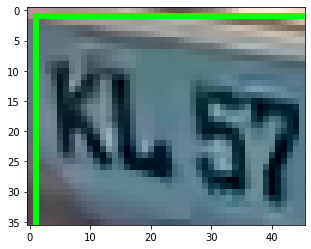

In [101]:
im=cv2.imread("/content/test1.png")
plt.imshow(im)
reader = easyocr.Reader(['en'])
result2 = reader.readtext(im,detail=0,allowlist='0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ')
result2
string2=" "
C2=string2.join(result2)
print(string2.join(result2))

Number plate is: KL57C8049


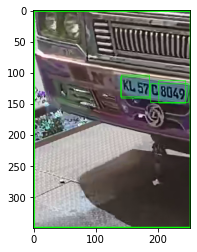

In [109]:
Plate=C2+C1

plt.imshow(image_copy)
print("Number plate is: "+Plate)

In [110]:
from google.colab import auth
auth.authenticate_user()